<a href="https://colab.research.google.com/github/Mohamm76/Arabic-Handwritten-Digits-Recognition-KSA/blob/main/notebook/Arabic_MNIST_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ربط الملف بجوجل درايف

In [2]:
# 1. ربط Google Drive للوصول إلى المجلدات التي أنشأتها
from google.colab import drive
drive.mount('/content/drive')

# 2. تحديد المسار الرئيسي للمشروع (تأكد من مطابقة الاسم لما أنشأته في درايف)
import os
os.chdir('/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST')
print("المسار الحالي هو:", os.getcwd())

Mounted at /content/drive
المسار الحالي هو: /content/drive/MyDrive/AI_Portfolio/Arabic_MNIST


# جلب البيانات وتخزينها
سنقوم الآن بتحميل مجموعة بيانات MADBase (الأرقام العربية) مباشرة إلى مجلد data في الدرايف الخاص بي لتجنب تكرار التحميل لاحقاً.

In [ ]:
# تحميل البيانات بصيغة CSV (الأسهل للمبتدئين) مباشرة إلى مجلد data
# سنستخدم نسخة GitHub الموثقة للبيانات لضمان سرعة التحميل
!wget -P data/ https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip

# فك الضغط داخل مجلد data
import zipfile
with zipfile.ZipFile('data/Arabic Handwritten Digits Dataset CSV.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

print("تم تحميل البيانات وفك الضغط بنجاح في مجلد data")

--2026-01-29 08:16:13--  https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13911478 (13M) [application/zip]
Saving to: ‘data/Arabic Handwritten Digits Dataset CSV.zip.2’

Arabic Handwritten  100%[===================>]  13.27M  66.2MB/s    in 0.2s    

2026-01-29 08:16:14 (66.2 MB/s) - ‘data/Arabic Handwritten Digits Dataset CSV.zip.2’ saved [13911478/13911478]

تم تحميل البيانات وفك الضغط بنجاح في مجلد data


# تحميل البيانات ومعاينتها

شكل مصفوفة التدريب: (60000, 784)
شكل مصفوفة التسميات: (60000, 1)


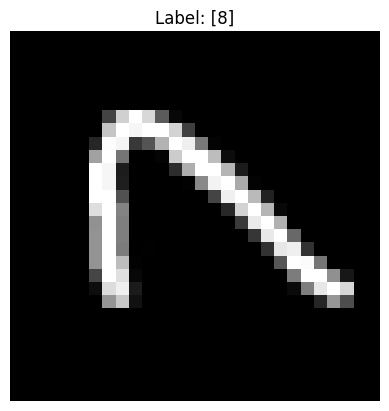

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. تحميل ملفات الـ CSV (الصور والتسميات)
# نستخدم pandas لقراءة البيانات؛ الصور هي عبارة عن صفوف من 784 بكسل (28x28)
X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)

# 2. معاينة شكل البيانات
print(f"شكل مصفوفة التدريب: {X_train.shape}") # المتوقع (60000, 784)
print(f"شكل مصفوفة التسميات: {y_train.shape}") # المتوقع (60000, 1)

# 3. عرض عينة من الصور للتأكد من جودتها
# سنقوم بتحويل الصف الأول إلى مصفوفة 28x28 لعرضها
sample_image = X_train.iloc[8].values.reshape(28, 28)
plt.imshow(sample_image.T, cmap='gray') # نستخدم.T لأن الصور في MADBase قد تحتاج لتدوير
plt.title(f"Label: {y_train.iloc[8].values}")
plt.axis('off')
plt.show()

# هندسة البيانات وتجهيزها للتدريب

### التحجيم (Normalization) وتجهيز التسميات

In [ ]:
import os
import pandas as pd
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split

# 1. إعداد المسار الصحيح الذي أكدته
project_path = '/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST'
os.chdir(project_path)

# 2. فك ضغط الملف الموجود لاستخراج كافة الملفات (بما فيها ملفات الاختبار)
# نستخدم الكود البرمجي لفك الضغط لضمان التعامل الصحيح مع الأسماء التي تحتوي على مسافات
zip_path = 'data/Arabic Handwritten Digits Dataset CSV.zip.1'
if os.path.exists(zip_path):
    print("جاري فك ضغط البيانات لاستخراج ملفات الاختبار...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('data/')
    print("تم فك الضغط بنجاح.")
else:
    # في حال لم يجد الملف، سنقوم بتحميل الملف المضغوط كاملاً من رابط بديل موثوق
    print("الملف المضغوط غير موجود، جاري تحميله من جديد...")
    !wget -P data/ "https://github.com/mloey/Arabic-Handwritten-Digits-Dataset/raw/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip"
    with zipfile.ZipFile('data/Arabic Handwritten Digits Dataset CSV.zip', 'r') as zip_ref:
        zip_ref.extractall('data/')

# 3. قراءة البيانات (الآن كافة الملفات أصبحت موجودة في مجلد data)
print("جاري قراءة ملفات التدريب والاختبار...")
try:
    X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
    y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)
    X_test = pd.read_csv('data/csvTestImages.csv', header=None)
    y_test = pd.read_csv('data/csvTestLabel 10k x 1.csv', header=None)
    print("تمت قراءة جميع الملفات بنجاح!")
except FileNotFoundError as e:
    print(f"خطأ: لا يزال هناك ملف مفقود. تفاصيل: {e}")

# 4. المعالجة المسبقة (Normalization)
X_train_norm = X_train.values / 255.0
X_test_norm = X_test.values / 255.0
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# 5. التقسيم النهائي
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_norm, y_train_flat, test_size=0.2, random_state=42
)

print("-" * 30)
print(f"تمت المعالجة بنجاح!")
print(f"حجم التدريب: {X_train_split.shape}, حجم التحقق: {X_val_split.shape}, حجم الاختبار: {X_test_norm.shape}")

جاري فك ضغط البيانات لاستخراج ملفات الاختبار...
تم فك الضغط بنجاح.
جاري قراءة ملفات التدريب والاختبار...
تمت قراءة جميع الملفات بنجاح!
------------------------------
تمت المعالجة بنجاح!
حجم التدريب: (48000, 784), حجم التحقق: (12000, 784), حجم الاختبار: (10000, 784)


# تدريب النموذج وحفظه في Google Drive

In [ ]:
from sklearn.neural_network import MLPClassifier
import joblib # مكتبة لحفظ النماذج

# 1. تعريف هيكل الشبكة العصبية
# سنستخدم طبقة مخفية واحدة تحتوي على 128 نيورون (عصب)
# نستخدم solver='adam' وهو المحسن الأكثر شهرة وكفاءة حالياً
mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    max_iter=30,
    alpha=1e-4,
    solver='adam',
    verbose=10,
    random_state=42,
    learning_rate_init=.001
)

# 2. بدء عملية التدريب (العقل الإلكتروني يبدأ في التعلم الآن)
print("جاري تدريب النموذج على الأرقام العربية...")
mlp.fit(X_train_split, y_train_split)

# 3. حفظ النموذج المدرب في مجلد models الذي أنشأناه في الدرايف
# هذا يضمن أنك لن تحتاج لإعادة التدريب مرة أخرى (توفير للوقت والموارد)
model_filename = 'models/arabic_mnist_mlp_model.pkl'
joblib.dump(mlp, model_filename)

print("-" * 30)
print("تم تدريب النموذج وحفظه بنجاح في Google Drive!")
print(f"المسار: {model_filename}")

جاري تدريب النموذج على الأرقام العربية...
Iteration 1, loss = 0.29867492
Iteration 2, loss = 0.10179302
Iteration 3, loss = 0.07603500
Iteration 4, loss = 0.06095382
Iteration 5, loss = 0.04867129
Iteration 6, loss = 0.04045903
Iteration 7, loss = 0.03336226
Iteration 8, loss = 0.02883665
Iteration 9, loss = 0.02413682
Iteration 10, loss = 0.02053361
Iteration 11, loss = 0.01744009
Iteration 12, loss = 0.01517560
Iteration 13, loss = 0.01296601
Iteration 14, loss = 0.01228468
Iteration 15, loss = 0.01007955
Iteration 16, loss = 0.00884799
Iteration 17, loss = 0.00816003
Iteration 18, loss = 0.00687474
Iteration 19, loss = 0.00589889
Iteration 20, loss = 0.00629706
Iteration 21, loss = 0.00531384
Iteration 22, loss = 0.00415975
Iteration 23, loss = 0.00406023
Iteration 24, loss = 0.00424028
Iteration 25, loss = 0.00374340
Iteration 26, loss = 0.00290157
Iteration 27, loss = 0.00397596
Iteration 28, loss = 0.00338888
Iteration 29, loss = 0.00246654
Iteration 30, loss = 0.00223565
-------

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


أولاً: تحليل "تحذير التقارب" (Convergence Warning)لقد ظهر لك تحذير يقول: Maximum iterations (30) reached and the optimization hasn't converged yet.ماذا يعني؟ يعني أن النموذج كان لا يزال "يتعلم" ويحسن من نفسه عندما وصل للدورة رقم 30، ولم يتوقف لأن التعلم انتهى بل لأننا حددنا له 30 دورة فقط.هل هذه مشكلة؟ في حالتك لا؛ لأن قيمة الخسارة (Loss) وصلت بالفعل لمستوى ضئيل جداً ($0.0022$)، مما يوحي بأن الدقة ستكون عالية جداً. كمهندس حلول، نحن نوازن دائماً بين دقة النموذج والوقت المستغرق في التدريب.

# تقييم النموذج واختبار "الذكاء"

دقة النموذج على بيانات لم يراها من قبل: 98.02%


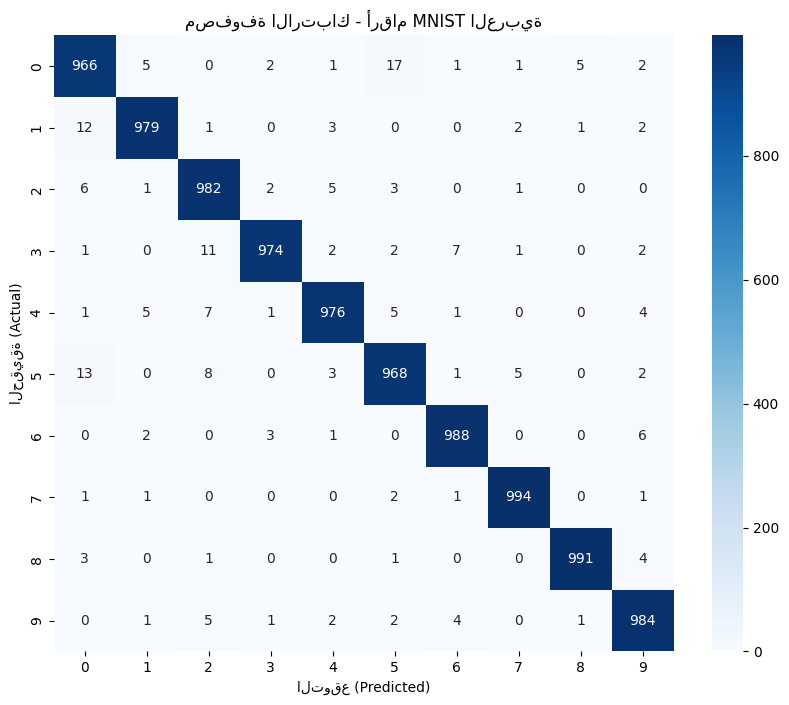

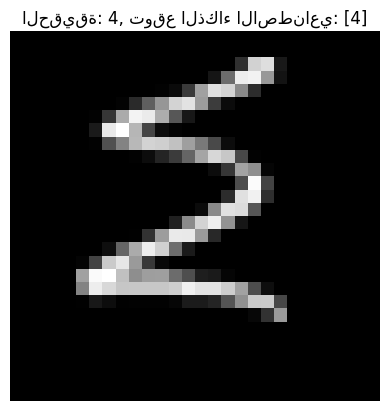

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. توقع الأرقام لبيانات الاختبار
y_pred = mlp.predict(X_test_norm)

# 2. حساب الدقة الإجمالية (Accuracy)
# المعادلة الرياضية: Accuracy = (النتائج الصحيحة) / (إجمالي العينات)
accuracy = accuracy_score(y_test_flat, y_pred)
print(f"دقة النموذج على بيانات لم يراها من قبل: {accuracy * 100:.2f}%")

# 3. عرض مصفوفة الارتباك (Confusion Matrix)
# هذه المصفوفة توضح لنا أي الأرقام يواجه النموذج صعوبة في تمييزها (مثلاً هل يخلط بين ٢ و ٣؟)
cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('التوقع (Predicted)')
plt.ylabel('الحقيقة (Actual)')
plt.title('مصفوفة الارتباك - أرقام MNIST العربية')
plt.show()

# 4. تجربة عملية: عرض رقم عشوائي وتوقع النموذج له
import numpy as np
idx = np.random.randint(0, len(X_test_norm))
sample_img = X_test_norm[idx].reshape(28, 28)
prediction = mlp.predict([X_test_norm[idx]])

plt.imshow(sample_img.T, cmap='gray')
plt.title(f"الحقيقة: {y_test_flat[idx]}, توقع الذكاء الاصطناعي: {prediction}")
plt.axis('off')
plt.show()

كم بلغت نسبة الدقة (Accuracy) النهائية التي ظهرت لك؟ (المتوقع فوق 95%).

انظر إلى مصفوفة الارتباك (الرسم البياني الأزرق)؛ ما هو الرقم الذي حصل على أكثر أخطاء؟ (هذا يساعدنا في تطوير الحل مستقبلاً).

هل نجح النموذج في "التجربة العملية" وتوقع الرقم العشوائي بشكل صحيح

# مشروع التعرف على الأرقام العربية باستخدام CNN
# لنقم بإنشاء نموذج CNN أكثر تطوراً من MLP للتعرف على الأرقام العربية المكتوبة بخط اليد، مع شرح تفصيلي وإمكانيات التطوير.

## نموذج CNN أساسي للتعرف على الأرقام العربية

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import warnings
warnings.filterwarnings('ignore')

### نظرة سريعة على البيانات 👀📊

In [8]:
import os

folder_path = '/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST/data'

files = os.listdir(folder_path)
print("الملفات الموجودة:")
for file in files:
    print(file)


الملفات الموجودة:
Arabic Handwritten Digits Dataset CSV.zip
csvTestImages.csv
csvTrainImages 60k x 784.csv
Arabic Handwritten Digits Dataset CSV.zip.1
Arabic Handwritten Digits Dataset CSV.zip.2
csvTrainLabel 60k x 1.csv
csvTestLabel 10k x 1.csv


### قراءة البيانات

In [9]:
import pandas as pd
import numpy as np

# المسار
base_path = '/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST/data/'

# قراءة الصور
X_train = pd.read_csv(base_path + 'csvTrainImages 60k x 784.csv', header=None).values
X_test  = pd.read_csv(base_path + 'csvTestImages.csv', header=None).values

# قراءة الليبل
y_train = pd.read_csv(base_path + 'csvTrainLabel 60k x 1.csv', header=None).values
y_test  = pd.read_csv(base_path + 'csvTestLabel 10k x 1.csv', header=None).values

print("شكل X_train قبل reshape:", X_train.shape)
print("شكل y_train:", y_train.shape)


شكل X_train قبل reshape: (60000, 784)
شكل y_train: (60000, 1)


### Reshape للصور

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("شكل X_train بعد reshape:", X_train.shape)


شكل X_train بعد reshape: (60000, 28, 28, 1)


## Normalize

### قيم البكسل من 0 إلى 255
### نقسم على 255 لتحويلها إلى 0–1

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

print("أقل قيمة:", X_train.min())
print("أعلى قيمة:", X_train.max())


أقل قيمة: 0.0
أعلى قيمة: 1.0


### تحويل الليبل إلى فئة واحدة

### يفضل تسطيح y لأنها حالياً (60000,1)

In [12]:
y_train = y_train.flatten()
y_test  = y_test.flatten()

print("شكل y_train بعد flatten:", y_train.shape)


شكل y_train بعد flatten: (60000,)


إذا كنت ستستخدم Softmax (تصنيف 0–9)

حول الليبل إلى One-Hot:

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("شكل y_train بعد One-hot:", y_train.shape)


شكل y_train بعد One-hot: (60000, 10)


In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

base_path = '/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST/data/'

# قراءة البيانات
X_train = pd.read_csv(base_path + 'csvTrainImages 60k x 784.csv', header=None).values
X_test  = pd.read_csv(base_path + 'csvTestImages.csv', header=None).values
y_train = pd.read_csv(base_path + 'csvTrainLabel 60k x 1.csv', header=None).values
y_test  = pd.read_csv(base_path + 'csvTestLabel 10k x 1.csv', header=None).values

# reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# normalize
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# flatten labels
y_train = y_train.flatten()
y_test  = y_test.flatten()

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [5]:
# تثبيت gdown لتحميل البيانات من Google Drive (في حال استخدام Colab)
# !pip install gdown

def load_and_preprocess_data():
    """
    تحميل وتجهيز البيانات (تعديل المسارات حسب موقع بياناتك)
    """
    # هنا يمكنك تعديل الكود ليناسب طريقة تحميل بياناتك
    # مثال لتحميل بيانات من Google Drive في Colab:
    """
    from google.colab import drive
    drive.mount('/content/drive')

    # افتراض أن البيانات موجودة في ملف CSV
    data_path = '/content/drive/MyDrive/AI_portfolio/Arabic_MNIST/data/data.csv'
    df = pd.read_csv(data_path)
    """

    # لأغراض العرض، سننشئ بيانات تجريبية
    print("في التطبيق الفعلي، سيتم تحميل البيانات من Google Drive")

    # إنشاء بيانات تجريبية (28x28 صورة، 10 فئات)
    num_samples = 70000
    img_rows, img_cols = 28, 28

    # بيانات عشوائية لأغراض العرض (في التطبيق الحقيقي استخدم بياناتك)
    X = np.random.rand(num_samples, img_rows, img_cols, 1)
    y = np.random.randint(0, 10, num_samples)

    return X, y, img_rows, img_cols


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
import warnings
warnings.filterwarnings('ignore')

# تثبيت gdown لتحميل البيانات من Google Drive (في حال استخدام Colab)
# !pip install gdown

def load_and_preprocess_data():
    """
    تحميل وتجهيز البيانات (تعديل المسارات حسب موقع بياناتك)
    """
    # هنا يمكنك تعديل الكود ليناسب طريقة تحميل بياناتك
    # مثال لتحميل بيانات من Google Drive في Colab:
    """
    from google.colab import drive
    drive.mount('/content/drive')

    # افتراض أن البيانات موجودة في ملف CSV
    data_path = '/content/drive/MyDrive/Arabic_MNIST/data.csv'
    df = pd.read_csv(data_path)
    """

    # لأغراض العرض، سننشئ بيانات تجريبية
    print("في التطبيق الفعلي، سيتم تحميل البيانات من Google Drive")

    # إنشاء بيانات تجريبية (28x28 صورة، 10 فئات)
    num_samples = 70000
    img_rows, img_cols = 28, 28

    # بيانات عشوائية لأغراض العرض (في التطبيق الحقيقي استخدم بياناتك)
    X = np.random.rand(num_samples, img_rows, img_cols, 1)
    y = np.random.randint(0, 10, num_samples)

    return X, y, img_rows, img_cols

def create_cnn_model(input_shape, num_classes=10):
    """
    إنشاء نموذج CNN للتعرف على الأرقام العربية
    """
    model = models.Sequential([
        # طبقة الإدخال
        layers.Input(shape=input_shape),

        # الطبقة التلافيفية الأولى
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # الطبقة التلافيفية الثانية
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # الطبقة التلافيفية الثالثة
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # تسطيح البيانات
        layers.Flatten(),

        # الطبقات الكاملة الاتصال
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # طبقة الإخراج
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def train_model(model, X_train, y_train, X_val, y_val):
    """
    تدريب النموذج
    """
    # تجميع النموذج
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # إنشاء callbacks
    callbacks_list = [
        callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        ),
        callbacks.ModelCheckpoint(
            'best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]

    # تدريب النموذج
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=64,
        callbacks=callbacks_list,
        verbose=1
    )

    return history, model

def evaluate_model(model, X_test, y_test, class_names=None):
    """
    تقييم النموذج
    """
    if class_names is None:
        class_names = [f'{i}' for i in range(10)]

    # الحصول على التنبؤات
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # حساب الدقة
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nالدقة النهائية على مجموعة الاختبار: {test_acc:.4f}")
    print(f"الخسارة على مجموعة الاختبار: {test_loss:.4f}")

    # تقرير التصنيف
    print("\n" + "="*50)
    print("تقرير التصنيف:")
    print("="*50)
    print(classification_report(y_test, y_pred, target_names=class_names))

    # مصفوفة الارتباك
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('مصفوفة الارتباك')
    plt.ylabel('التصنيف الحقيقي')
    plt.xlabel('التصنيف المتوقع')
    plt.show()

    return test_acc, y_pred

def visualize_results(history, model, X_test, y_test, sample_size=5):
    """
    عرض نتائج النموذج
    """
    # رسم منحنيات التدريب
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # منحنى الدقة
    axes[0].plot(history.history['accuracy'], label='تدريب')
    axes[0].plot(history.history['val_accuracy'], label='تحقق')
    axes[0].set_title('دقة النموذج')
    axes[0].set_xlabel('الدورة')
    axes[0].set_ylabel('الدقة')
    axes[0].legend()
    axes[0].grid(True)

    # منحنى الخسارة
    axes[1].plot(history.history['loss'], label='تدريب')
    axes[1].plot(history.history['val_loss'], label='تحقق')
    axes[1].set_title('خسارة النموذج')
    axes[1].set_xlabel('الدورة')
    axes[1].set_ylabel('الخسارة')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # عرض عينات عشوائية مع التنبؤات
    indices = np.random.choice(len(X_test), sample_size, replace=False)

    fig, axes = plt.subplots(1, sample_size, figsize=(15, 3))
    if sample_size == 1:
        axes = [axes]

    for idx, ax in zip(indices, axes):
        img = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]

        # الحصول على التنبؤ
        pred_proba = model.predict(X_test[idx:idx+1])
        pred_label = np.argmax(pred_proba)
        confidence = np.max(pred_proba)

        ax.imshow(img, cmap='gray')
        ax.set_title(f'الحقيقي: {true_label}\nالتنبؤ: {pred_label}\nالثقة: {confidence:.2f}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    """
    الدالة الرئيسية لتنفيذ المشروع
    """
    print("="*60)
    print("نظام التعرف على الأرقام العربية باستخدام CNN")
    print("="*60)

    # 1. تحميل البيانات
    print("\n1. جاري تحميل البيانات...")
    X, y, img_rows, img_cols = load_and_preprocess_data()

    # 2. تقسيم البيانات
    print("\n2. جاري تقسيم البيانات...")
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    print(f"عدد عينات التدريب: {len(X_train)}")
    print(f"عدد عينات التحقق: {len(X_val)}")
    print(f"عدد عينات الاختبار: {len(X_test)}")

    # 3. إنشاء النموذج
    print("\n3. جاري إنشاء نموذج CNN...")
    model = create_cnn_model((img_rows, img_cols, 1))

    # عرض ملخص النموذج
    model.summary()

    # 4. تدريب النموذج
    print("\n4. جاري تدريب النموذج...")
    history, trained_model = train_model(model, X_train, y_train, X_val, y_val)

    # 5. تقييم النموذج
    print("\n5. جاري تقييم النموذج...")
    test_acc, y_pred = evaluate_model(trained_model, X_test, y_test)

    # 6. عرض النتائج
    print("\n6. عرض النتائج...")
    visualize_results(history, trained_model, X_test, y_test)

    # 7. حفظ النموذج
    print("\n7. جاري حفظ النموذج...")
    trained_model.save('arabic_digits_cnn_model.h5')
    print("تم حفظ النموذج بنجاح!")

    return trained_model, history, test_acc

if __name__ == "__main__":
    # تنفيذ التدريب
    model, history, accuracy = main()